In [8]:
import math
import numpy
import matplotlib.pyplot as plt

In [28]:
Q=numpy.array(range(1000))

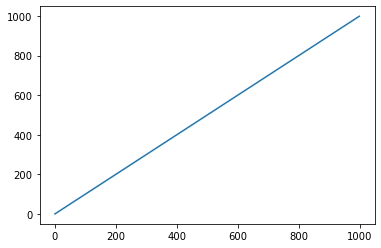

In [27]:
plt.plot(Q)

In [32]:
H_unsub=[.0386 * math.pow(q, 2/3)for q in Q]


In [33]:
H_sub=[.75 + .000016 *math.pow(q,2) for q in Q]


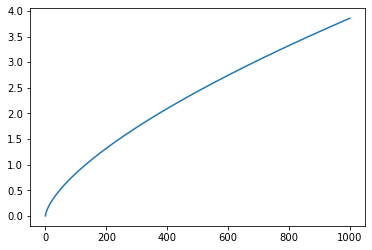

In [34]:
plt.plot(Q, H_unsub)

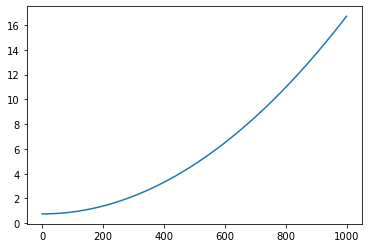

In [35]:
plt.plot(Q, H_sub)

In [36]:
H_max = [max(H_sub[i-1], H_unsub[i-1]) for i in Q]

In [37]:
H_max[:200]=H_unsub[:200]

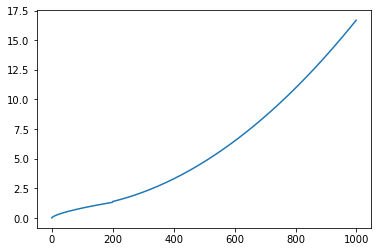

In [38]:
plt.plot(Q, H_max)

In [42]:
sum([H_sub[i-1]<H_unsub[i-1] for i in Q])

0